# Trial Dataset Sentimental Analysis

### Text classification and sentiment analysis: Yelp Reviews 

### Done before
#### Text classification and sentiment analysis: Yelp Reviews  
- Reviews & Stars by Year & Years of Membership Breakdown  
- Textblob for Sentiment Analysis  

#### Models
- Multiclass Naive Bayes   
- Multinomial Logistic Regression (Text Features/Combined Features)
- Decision tree
- Classification Tree
- Random forest

- K-fold Cross-validation
- Hyper-parameter tuning
- K-fold Cross-validation on Hyper-parameter tuning

- Test the models on Rotten Tomatoes datasets

### This week
- TF-IDF on Yelp and Rotten Tomatoes dataset
- POS Analysis (too few ADJ left)
- Latent Semantic Analysis/Topic coherence

- Tried running the entire Yelp dataset but failed (RAM issue)

- Literature reviews

### Next steps

### About 45 mins to run 

In [3]:
import numpy as np
import pandas as pd
import json

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
b_pandas = pd.read_csv('/Users/shawnho/Documents/Capstone/Second week/yelp_dataset/Trial.csv',parse_dates=True)
b_pandas

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,b'742gQ1wvbOY1ASV46EgsMw',b'_5ebIlD6-kN7jCKsKQ5xfg',b'3Z59UMun90xRiSU1XX8rhQ',5,0,0,0,We have been ordering here for the last few ye...,2020-12-04 22:20:16
1,1,b'iBUJvIOkToh2ZECVNq5PDg',b'iAD32p6h32eKDVxsPHSRHA',b'YB26JvvGS2LgkxEKOObSAw',5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
2,2,b'HgEofz6qEQqKYPT7YLA34w',b'rYvWv-Ny16b1lMcw1IP7JQ',b'jfIwOEXcVRyhZjM4ISOh4g',1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
3,3,b'milJ7UH4Od9pBe2gWac9tA',b'v7i4M7NIx3bMNMChaXjU7Q',b'raKflkp3CANr8N7qpQ3ZyQ',5,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15
4,4,b'Kxo5d6EOnOE-vERwQf2a1w',b'2ntnbUia9Bna62W0fqNcxg',b'S-VD26LE_LeJNx5nASk_pw',5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
...,...,...,...,...,...,...,...,...,...,...
692441,692441,b'MIXdpbbCTRAVdi8RiMjwdg',b's67G457QlHSvk5RjOMN91w',b'58MJvmfo5hyfBbvkr54sFA',5,1,0,0,Great gym. Was in Indy for 4 days on business...,2022-01-18 15:24:44
692442,692442,b'wD5ZWao_vjyT2h4xmGam8Q',b'7L7GL5Pi2cf8mbm2Dpw4zw',b'e_E-jq9mwm7wk75k7Yi-Xw',5,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
692443,692443,b'zHZ-A1qyKDEgyZMDaD--wg',b'_XVdmFWSgTN6YlojUxixTA',b'6WaI-IN8ql0xpEKlb4q8tg',5,1,0,0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01
692444,692444,b'shTPgbgdwTHSuU67mGCmZQ',b'Zo0th2m8Ez4gLSbHftiQvg',b'2vLksaMmSEcGbjI5gywpZA',5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10


In [4]:
b_pandas.stars.unique()

array([5, 1, 4, 3, 2])

> cross validation, hyper-parameter, Lasso, logistic regression

## Text classification and sentiment analysis: Yelp Reviews 

In [5]:
%matplotlib inline

from pathlib import Path
import json
from time import time

import numpy as np
import pandas as pd

from scipy import sparse

# spacy, textblob and nltk for language processing
from textblob import TextBlob

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

#import lightgbm as lgb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
np.random.seed(42)

In [6]:
#import lightgbm as lgb

In [7]:
yelp_reviews = b_pandas.copy() 
yelp_reviews.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692446 entries, 0 to 692445
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   692446 non-null  int64 
 1   review_id    692446 non-null  object
 2   user_id      692446 non-null  object
 3   business_id  692446 non-null  object
 4   stars        692446 non-null  int64 
 5   useful       692446 non-null  int64 
 6   funny        692446 non-null  int64 
 7   cool         692446 non-null  int64 
 8   text         692446 non-null  object
 9   date         692446 non-null  object
dtypes: int64(5), object(5)
memory usage: 52.8+ MB


### Explore data

In [8]:
yelp_dir = Path('results', 'yelp')

text_features_dir = yelp_dir / 'data'
if not text_features_dir.exists():
    text_features_dir.mkdir(exist_ok=True, parents=True)

### Reviews & Stars by Year 

In [9]:
yelp_reviews['date'] = pd.to_datetime(yelp_reviews['date'], errors='coerce')
yelp_reviews["year"] = yelp_reviews.date.dt.year

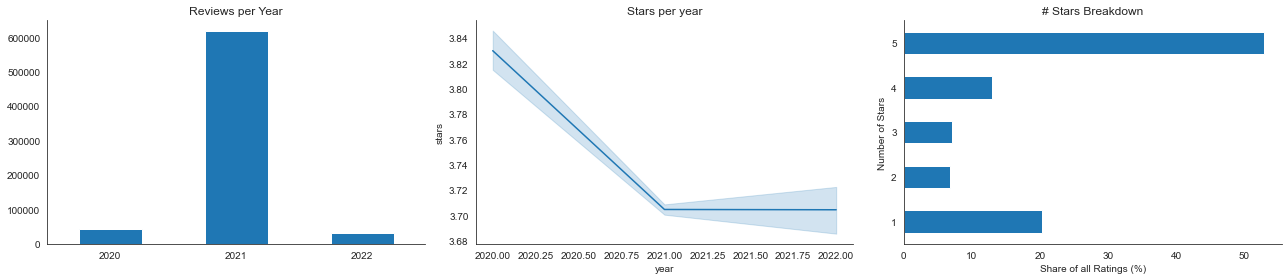

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
yelp_reviews.year.value_counts().sort_index().plot.bar(title='Reviews per Year', ax=axes[0], rot=0);
sns.lineplot(x='year', y='stars', data=yelp_reviews, ax=axes[1])
axes[1].set_title('Stars per year')

stars_dist = yelp_reviews.stars.value_counts(normalize=True).sort_index().mul(100)
stars_dist.index = stars_dist.index.astype(int)
stars_dist.plot.barh(title='# Stars Breakdown', ax=axes[2])
axes[2].set_xlabel('Share of all Ratings (%)')
axes[2].set_ylabel('Number of Stars');

sns.despine()
fig.tight_layout();

### Years of text Breakdown

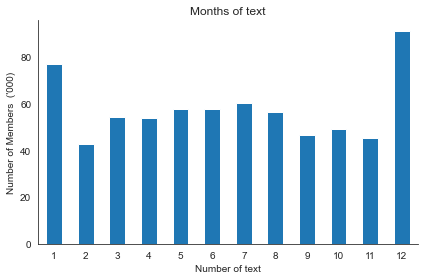

In [11]:
yelp_reviews["month"] = yelp_reviews.date.dt.month

ax = yelp_reviews.month.value_counts().div(1000).sort_index().plot.bar(title='Months of text',
                                                                            rot=0)
ax.set_xlabel('Number of text')
ax.set_ylabel("Number of Members  ('000)")
sns.despine()
plt.tight_layout()

### Create train-test split

In [151]:
train = yelp_reviews[yelp_reviews.month < 7].sample(frac=.25)
test = yelp_reviews[yelp_reviews.month > 6]

In [13]:
print(f'# Training Obs: {len(train):,.0f} | # Test Obs: {len(test):,.0f}')

# Training Obs: 85,889 | # Test Obs: 348,890


### Create Yelp review document-term matrix

In [14]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)
train_dtm = vectorizer.fit_transform(train.text)
train_dtm

<85889x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3283256 stored elements in Compressed Sparse Row format>

In [15]:
test_dtm = vectorizer.transform(test.text)

### Reload stored data

## Combine non-text features with the document-term matrix

In [16]:
df = pd.concat([train.drop(['text', 'stars', 'review_id', 'user_id', 'business_id', 'date']
                           , axis=1).assign(source='train'),
                test.drop(['text', 'stars', 'review_id', 'user_id', 'business_id', 'date']
                          , axis=1).assign(source='test')])

In [17]:
uniques = df.nunique()
binned = pd.concat([(df.loc[:, uniques[uniques > 20].index]
                     .apply(pd.qcut, q=10, labels=False, duplicates='drop')),
                    df.loc[:, uniques[uniques <= 20].index]], axis=1)
binned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434779 entries, 178248 to 692437
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  434779 non-null  int64 
 1   useful      434779 non-null  int64 
 2   funny       434779 non-null  int64 
 3   cool        434779 non-null  int64 
 4   year        434779 non-null  int64 
 5   month       434779 non-null  int64 
 6   source      434779 non-null  object
dtypes: int64(6), object(1)
memory usage: 26.5+ MB


In [18]:
dummies = pd.get_dummies(binned, 
                         columns=binned.columns.drop('source'), 
                         drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434779 entries, 178248 to 692437
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   source        434779 non-null  object
 1   Unnamed: 0_1  434779 non-null  uint8 
 2   Unnamed: 0_2  434779 non-null  uint8 
 3   Unnamed: 0_3  434779 non-null  uint8 
 4   Unnamed: 0_4  434779 non-null  uint8 
 5   Unnamed: 0_5  434779 non-null  uint8 
 6   Unnamed: 0_6  434779 non-null  uint8 
 7   Unnamed: 0_7  434779 non-null  uint8 
 8   Unnamed: 0_8  434779 non-null  uint8 
 9   Unnamed: 0_9  434779 non-null  uint8 
 10  useful_1      434779 non-null  uint8 
 11  useful_2      434779 non-null  uint8 
 12  funny_1       434779 non-null  uint8 
 13  cool_1        434779 non-null  uint8 
 14  year_2021     434779 non-null  uint8 
 15  year_2022     434779 non-null  uint8 
 16  month_2       434779 non-null  uint8 
 17  month_3       434779 non-null  uint8 
 18  month_4       43477

In [19]:
train_dummies = dummies[dummies.source=='train'].drop('source', axis=1)
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85889 entries, 178248 to 254638
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0_1  85889 non-null  uint8
 1   Unnamed: 0_2  85889 non-null  uint8
 2   Unnamed: 0_3  85889 non-null  uint8
 3   Unnamed: 0_4  85889 non-null  uint8
 4   Unnamed: 0_5  85889 non-null  uint8
 5   Unnamed: 0_6  85889 non-null  uint8
 6   Unnamed: 0_7  85889 non-null  uint8
 7   Unnamed: 0_8  85889 non-null  uint8
 8   Unnamed: 0_9  85889 non-null  uint8
 9   useful_1      85889 non-null  uint8
 10  useful_2      85889 non-null  uint8
 11  funny_1       85889 non-null  uint8
 12  cool_1        85889 non-null  uint8
 13  year_2021     85889 non-null  uint8
 14  year_2022     85889 non-null  uint8
 15  month_2       85889 non-null  uint8
 16  month_3       85889 non-null  uint8
 17  month_4       85889 non-null  uint8
 18  month_5       85889 non-null  uint8
 19  month_6       85889

### Train set

In [20]:
# Cast other feature columns to float and convert to a sparse matrix.
train_numeric = sparse.csr_matrix(train_dummies.astype(np.uint8))
train_numeric.shape

(85889, 26)

In [21]:
# Combine sparse matrices.
train_dtm_numeric = sparse.hstack((train_dtm, train_numeric))
train_dtm_numeric.shape

(85889, 10026)

### Repeat for test set

In [22]:
test_dummies = dummies[dummies.source=='test'].drop('source', axis=1)
test_numeric = sparse.csr_matrix(test_dummies.astype(np.int8))
test_dtm_numeric = sparse.hstack((test_dtm, test_numeric))
test_dtm_numeric.shape

(348890, 10026)

### Benchmark Accuracy

In [23]:
accuracy, runtime = {}, {}
predictions = test[['stars']].copy()

In [24]:
naive_prediction = np.full_like(predictions.stars,
                                fill_value=train.stars.mode().iloc[0])

In [25]:
naive_benchmark = accuracy_score(predictions.stars, naive_prediction)

In [26]:
naive_benchmark

0.5177849752070853

### Model Evaluation Helper

In [27]:
def evaluate_model(model, X_train, X_test, name, store=False):
    start = time()
    model.fit(X_train, train.stars)
    runtime[name] = time() - start
    predictions[name] = model.predict(X_test)
    accuracy[result] = accuracy_score(test.stars, predictions[result])
    if store:
        joblib.dump(model, f'results/{result}.joblib')

### Multiclass Naive Bayes

In [28]:
nb = MultinomialNB()

#### Text Features

In [29]:
result = 'nb_text'

In [30]:
evaluate_model(nb, train_dtm, test_dtm, result, store=False)

#### Accuracy

In [31]:
accuracy[result]

0.6669637994783456

In [32]:
print("The prediction produces", 100*accuracy[result],"% accuracy on the test set")
print("It's a", 100*(accuracy[result] - naive_benchmark), "% improvement over the benchmark")

The prediction produces 66.69637994783456 % accuracy on the test set
It's a 14.917882427126028 % improvement over the benchmark


#### Confusion Matrix

In [33]:
stars = index = list(range(1, 6))
pd.DataFrame(confusion_matrix(test.stars, 
                              predictions[result]),
             columns=stars,
             index=stars)

,1,2,3,4,5
1,54605,12336,4160,1000,1001
2,7802,7192,6376,1715,859
3,3580,4038,8751,6746,1952
4,2166,1393,4276,24012,14280
5,9410,1280,2058,29765,138137


### Text & Numeric Features

In [34]:
result = 'nb_combined'

In [35]:
evaluate_model(nb, train_dtm_numeric, test_dtm_numeric, result, store=False)

#### Accuracy

In [36]:
accuracy[result]

0.6396944595717848

### Multinomial Logistic Regression

In [37]:
Cs = np.logspace(-5, 5, 11)

### Text Features

In [38]:
log_reg_text_accuracy = {}
log_reg_text_runtime = []
for i, C in enumerate(Cs):
    start = time()
    model = LogisticRegression(C=C,
                               multi_class='multinomial',
                               solver='lbfgs')

    model.fit(train_dtm, train.stars)
    log_reg_text_runtime.append(time() - start)
    log_reg_text_accuracy[C] = accuracy_score(test.stars,
                                              model.predict(test_dtm))

    print(f'{C:12.5f}: {log_reg_text_runtime[i]:.2f}s | {log_reg_text_accuracy[C]:.2%}', flush=True)

     0.00001: 1.30s | 52.48%
     0.00010: 0.96s | 60.40%
     0.00100: 1.80s | 69.94%
     0.01000: 4.19s | 73.69%
     0.10000: 4.43s | 74.08%
     1.00000: 4.25s | 72.17%
    10.00000: 4.59s | 71.07%
   100.00000: 4.59s | 71.16%
  1000.00000: 4.55s | 71.06%
 10000.00000: 4.49s | 71.17%
100000.00000: 4.63s | 71.04%


In [39]:
pd.Series(log_reg_text_accuracy).to_csv(yelp_dir / 'logreg_text.csv')

In [40]:
accuracy['lr_text'] = pd.Series(log_reg_text_accuracy).max()
runtime['lr_text'] = np.mean(log_reg_text_runtime)

## Combined Features

In [41]:
log_reg_comb_accuracy = {}
log_reg_comb_runtime = []
for i, C in enumerate(Cs):
    start = time()
    model = LogisticRegression(C=C,
                               multi_class='multinomial',
                               solver='lbfgs')

    model.fit(train_dtm_numeric, train.stars)
    log_reg_comb_runtime.append(time() - start)
    log_reg_comb_accuracy[C] = accuracy_score(test.stars,
                                              model.predict(test_dtm_numeric))

    print(f'{C:12.5f}: {log_reg_comb_runtime[i]:.2f}s | {log_reg_comb_accuracy[C]:.2%}', flush=True)

     0.00001: 1.13s | 52.48%
     0.00010: 1.35s | 60.38%
     0.00100: 2.59s | 69.83%
     0.01000: 4.54s | 73.62%
     0.10000: 4.61s | 74.06%
     1.00000: 4.66s | 72.40%
    10.00000: 4.40s | 71.65%
   100.00000: 4.58s | 71.73%
  1000.00000: 4.58s | 71.43%
 10000.00000: 4.58s | 71.00%
100000.00000: 4.58s | 71.55%


In [42]:
pd.Series(log_reg_comb_accuracy).to_csv(yelp_dir / 'logreg_combined.csv')

In [43]:
accuracy['lr_comb'] = pd.Series(log_reg_comb_accuracy).max()
runtime['lr_comb'] = np.mean(log_reg_comb_runtime)

## Comparison (This part is  incompleted)

In [44]:
#model_map = {'nb_combined': 'Naive Bayes',
#             'lr_comb': 'Logistic Regression',
#             'lgb_comb': 'LightGBM'}

model_map = {'nb_combined': 'Naive Bayes',
             'lr_comb': 'Logistic Regression'}

In [45]:
accuracy_ = {model_map[k]: v for k, v in accuracy.items() if model_map.get(k)}

In [46]:
log_reg_text = pd.read_csv(yelp_dir / 'logreg_text.csv',
                       index_col=0,
                       squeeze=True)
log_reg_combined = pd.read_csv(yelp_dir / 'logreg_combined.csv',
                       index_col=0,
                       squeeze=True)

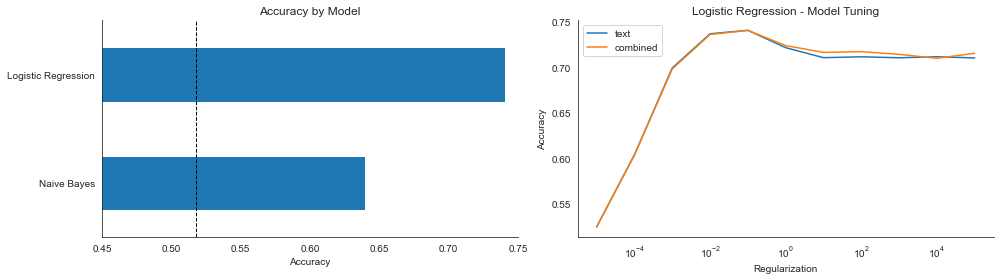

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.45, .75), title='Accuracy by Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')


log_reg = (log_reg_text.to_frame('text')
           .join(log_reg_combined.to_frame('combined')))
log_reg.plot(logx=True,
             ax=axes[1],
             title='Logistic Regression - Model Tuning')
axes[1].set_xlabel('Regularization')
axes[1].set_ylabel('Accuracy')
axes[0].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## Textblob for Sentiment Analysis

In [48]:
sample_review = train.text.sample(1).iloc[0]
print(sample_review)

One of the best things I've ever eaten is the Bananas foster french toast. Oh my stars!


In [49]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
TextBlob(sample_review).sentiment.polarity

0.5

In [50]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [51]:
train['sentiment'] = train.text.apply(detect_sentiment)

In [52]:
#sample_reviews = train[['stars', 'text']].sample(100000)

sample_reviews = train[['stars', 'text']].sample(50000)

In [53]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
sample_reviews['sentiment'] = sample_reviews.text.apply(detect_sentiment)

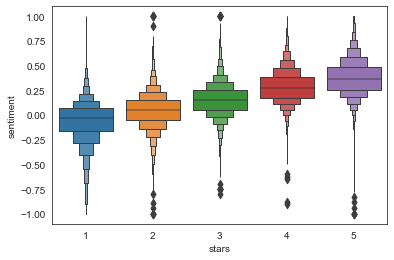

In [54]:
# Box plot of sentiment grouped by stars
sns.boxenplot(x='stars', y='sentiment', data=train);

In [55]:
# Widen the column display.
pd.set_option('max_colwidth', 500)

In [56]:
# Reviews with most negative sentiment
train[train.sentiment == -1].text.head()

537526                                                                                                                                                                                                                                                                                                                                                                                                           Awful customer service. The guy talking my order kept rolling his eyes and giving me attitude for no reason.
464382                                                                                                                                                                                                                                                                                                                                                                                                                  Worst restaurant ever seen drive through is terrible it take forever to get someth

In [57]:
# Negative sentiment in a 5-star review
train.loc[(train.stars == 5) & (train.sentiment < -0.3), 'text'].head(1)

307175    I had a truly awful day at work, leaving nearly two hours after we normally closed; Jasmine made me a buffalo chicken cheesesteak so good I forgot about how awful the rest of the day was.
Name: text, dtype: object

In [58]:
# Positive sentiment in a 1-star review
train.loc[(train.stars == 1) & (train.sentiment > 0.5), 'text'].head(1)

519746    The drinks are overpriced. The food was ok at best. Staff does not enforce masks on customers.
Name: text, dtype: object

In [59]:
# Reset the column display width.
#pd.reset_option('max_colwidth')

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

In [61]:
df_decisiontree = b_pandas.copy()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
df_decisiontree['sentiment'] = df_decisiontree.text.apply(detect_sentiment)

In [64]:
x_train, x_test, y_train, y_test = \
train_test_split(df_decisiontree[["sentiment", "useful", "funny", "cool"]], 
                 df_decisiontree.stars, test_size=0.3, random_state=0)

In [65]:
model_dt = model.fit(x_train, y_train)

In [66]:
from sklearn import tree

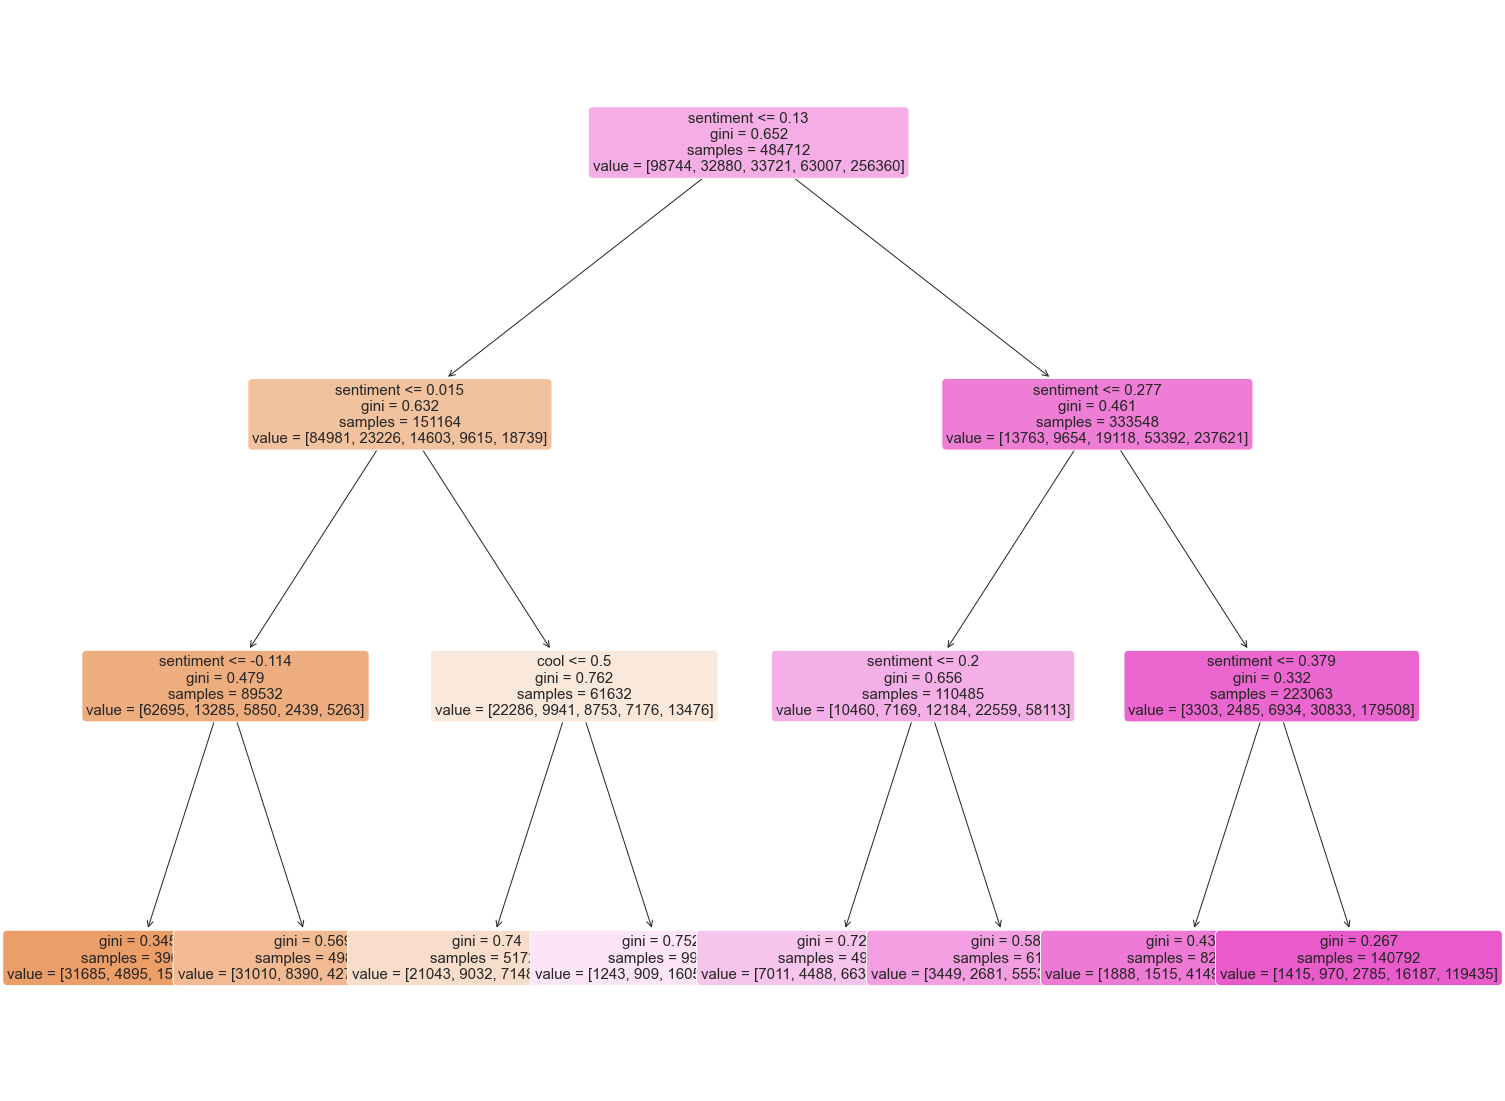

In [67]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names = x_train.columns, filled= True, rounded= True, fontsize=15)

In [68]:
accuracy['dt_comb'] = pd.Series(accuracy_score(y_test, model.predict(x_test)))[0]

### Classification Tree

In [70]:
model_dc = clf_tree_t2.fit(x_train, y_train)

In [71]:
accuracy['ct_comb'] = pd.Series(accuracy_score(y_test, clf_tree_t2.predict(x_test)))[0]

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_reg = RandomForestClassifier()

rf_reg.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
rf_reg.feature_importances_

array([0.93659003, 0.02006388, 0.01416076, 0.02918533])

In [74]:
accuracy['rf_comb'] = pd.Series(accuracy_score(y_test, rf_reg.predict(x_test)))[0]

In [75]:
model_map = {'nb_combined': 'Naive Bayes',
             'lr_comb': 'Logistic Regression',
             'dt_comb': 'Decision tree',
            'ct_comb': 'Classification Tree',
            'rf_comb': 'Random forest'}
accuracy_ = {model_map[k]: v for k, v in accuracy.items() if model_map.get(k)}

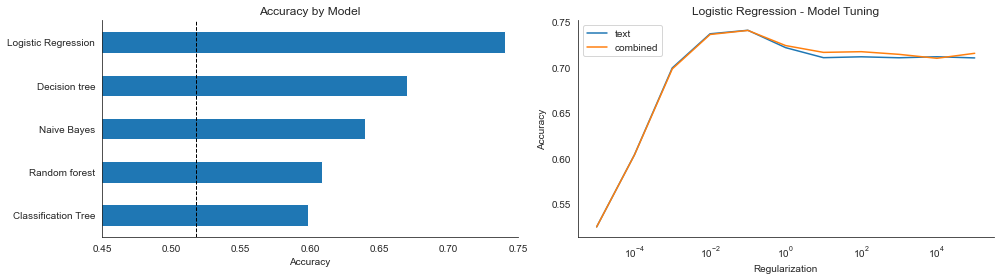

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.45, .75), title='Accuracy by Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')


log_reg = (log_reg_text.to_frame('text')
           .join(log_reg_combined.to_frame('combined')))
log_reg.plot(logx=True,
             ax=axes[1],
             title='Logistic Regression - Model Tuning')
axes[1].set_xlabel('Regularization')
axes[1].set_ylabel('Accuracy')
axes[0].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## K-fold Cross Validation

In [77]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [78]:
cross_accuracy = {}

kf = KFold(n_splits=5, random_state=None) 
result = cross_val_score(nb , train_dtm, train.stars, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
cross_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.67213878 0.67208057 0.67481663 0.67109093 0.67677709]
Avg accuracy: 0.6733807984292193


In [79]:
MLR = LogisticRegression(C=C,
                               multi_class='multinomial',
                               solver='lbfgs')
result = cross_val_score(MLR , train_dtm_numeric, train.stars, cv = kf)

In [80]:
print(result)
print("Avg accuracy: {}".format(result.mean()))
cross_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.7150425  0.71283036 0.71707999 0.71707999 0.71560808]
Avg accuracy: 0.7155281826531678


In [81]:
result = cross_val_score(model , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
cross_accuracy['DT'] = pd.Series(result.mean())[0]

[0.66904263 0.66913547 0.66953436 0.67082379 0.67278373]
Avg accuracy: 0.6702639966617057


In [82]:
result = cross_val_score(clf_tree_t2 , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
cross_accuracy['CF'] = pd.Series(result.mean())[0]

[0.59462777 0.59474124 0.59708898 0.59613996 0.59980194]
Avg accuracy: 0.5964799790204232


In [83]:
result = cross_val_score(rf_reg , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
cross_accuracy['RF'] = pd.Series(result.mean())[0]

[0.60538667 0.60612937 0.60711559 0.60585711 0.61031338]
Avg accuracy: 0.6069604268200666


In [84]:
model_map_2 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
cross_accuracy_ = {model_map_2[k]: v for k, v in cross_accuracy.items() if model_map_2.get(k)}

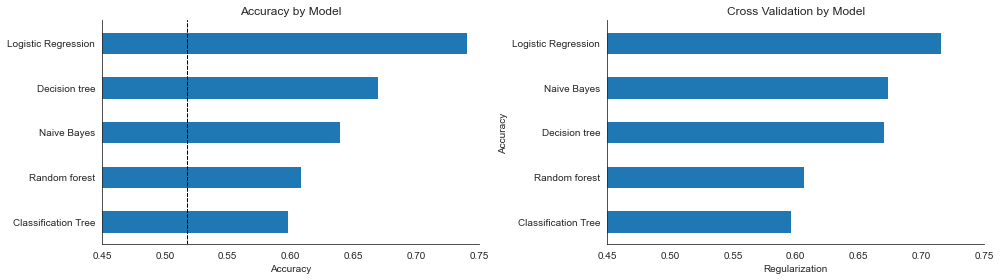

In [85]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.45, .75), title='Accuracy by Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')

pd.Series(cross_accuracy_).sort_values().plot.barh(
    ax=axes[1], xlim=(.45, .75), title='Cross Validation by Model')

axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')
axes[1].set_xlabel('Regularization')
axes[1].set_ylabel('Accuracy')
axes[0].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

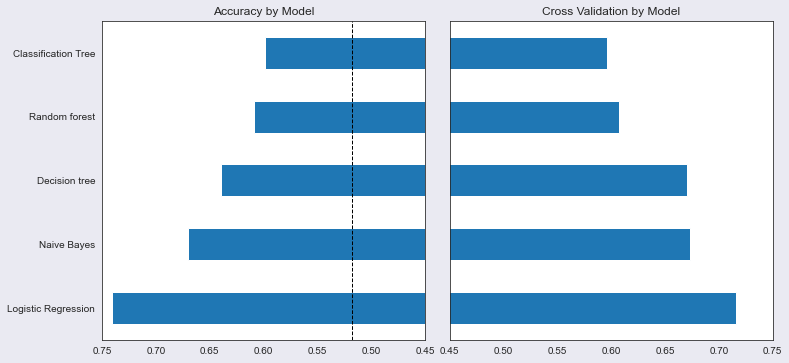

In [86]:
facecolor = '#eaeaf2'
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.45, .75), title='Accuracy by Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')

pd.Series(cross_accuracy_).sort_values().plot.barh(
    ax=axes[1], xlim=(.45, .75), title='Cross Validation by Model')

axes[0].invert_xaxis() 
plt.gca().invert_yaxis()

##  Hyperparameter Tuning

### Hyperparameter Tuning (Naive Bayes)

In [87]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define dataset

# define models and parameters
fit_prior = ['True', 'False']
alpha = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(alpha=alpha,fit_prior=fit_prior)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=nb, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_dtm, train.stars)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691315 using {'alpha': 10, 'fit_prior': 'True'}
0.689987 (0.001882) with: {'alpha': 100, 'fit_prior': 'True'}
0.689987 (0.001882) with: {'alpha': 100, 'fit_prior': 'False'}
0.691315 (0.004912) with: {'alpha': 10, 'fit_prior': 'True'}
0.691315 (0.004912) with: {'alpha': 10, 'fit_prior': 'False'}
0.672849 (0.004179) with: {'alpha': 1.0, 'fit_prior': 'True'}
0.672849 (0.004179) with: {'alpha': 1.0, 'fit_prior': 'False'}
0.672539 (0.004513) with: {'alpha': 0.1, 'fit_prior': 'True'}
0.672539 (0.004513) with: {'alpha': 0.1, 'fit_prior': 'False'}
0.672884 (0.004536) with: {'alpha': 0.01, 'fit_prior': 'True'}
0.672884 (0.004536) with: {'alpha': 0.01, 'fit_prior': 'False'}


### Hyperparameter Tuning (Multinomial Logistic Regression)

In [88]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=234)

In [89]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define dataset

# define models and parameters
solvers = ['sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [90]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_dtm_numeric, train.stars)

In [91]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752894 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.744441 (0.003039) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.750244 (0.003315) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.744496 (0.003036) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.750275 (0.003374) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.745602 (0.002992) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.750616 (0.003316) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.751676 (0.003578) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.752894 (0.003549) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.748435 (0.003140) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.748427 (0.003104) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


### Hyperparameter Tuning (Decision tree)

In [92]:
max_depth = [2, 3, 4, 5]
min_samples_leaf = [5, 10, 25, 50]
max_features = ["sqrt", "auto"]

# define grid search
grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.670140 using {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 25}
0.631999 (0.055420) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.635856 (0.053081) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10}
0.632986 (0.055133) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 25}
0.623992 (0.057931) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 50}
0.644075 (0.046235) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 5}
0.639876 (0.049683) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 10}
0.636183 (0.053590) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 25}
0.628566 (0.056489) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 50}
0.650496 (0.039245) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.654919 (0.037388) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10}
0.65028

### Hyperparameter Tuning (Classification tree)

In [93]:
max_depth = [2, 3, 4, 5]
min_samples_leaf = [5, 10, 25, 50]
max_features = ["sqrt", "auto"]

# define grid search
grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf_tree_t2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.669824 using {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 10}
0.633037 (0.054475) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.649201 (0.042824) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10}
0.648620 (0.042935) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 25}
0.618193 (0.061248) with: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 50}
0.619286 (0.061302) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 5}
0.636174 (0.053371) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 10}
0.632253 (0.055565) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 25}
0.633131 (0.054856) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 50}
0.653268 (0.036720) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.647030 (0.042574) with: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10}
0.65930

### Hyperparameter Tuning (Random forest)

In [94]:
n_estimators = [10, 50, 100]
max_features = ['sqrt', 'log2']
min_samples_split = [2, 3]

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features, min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(x_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

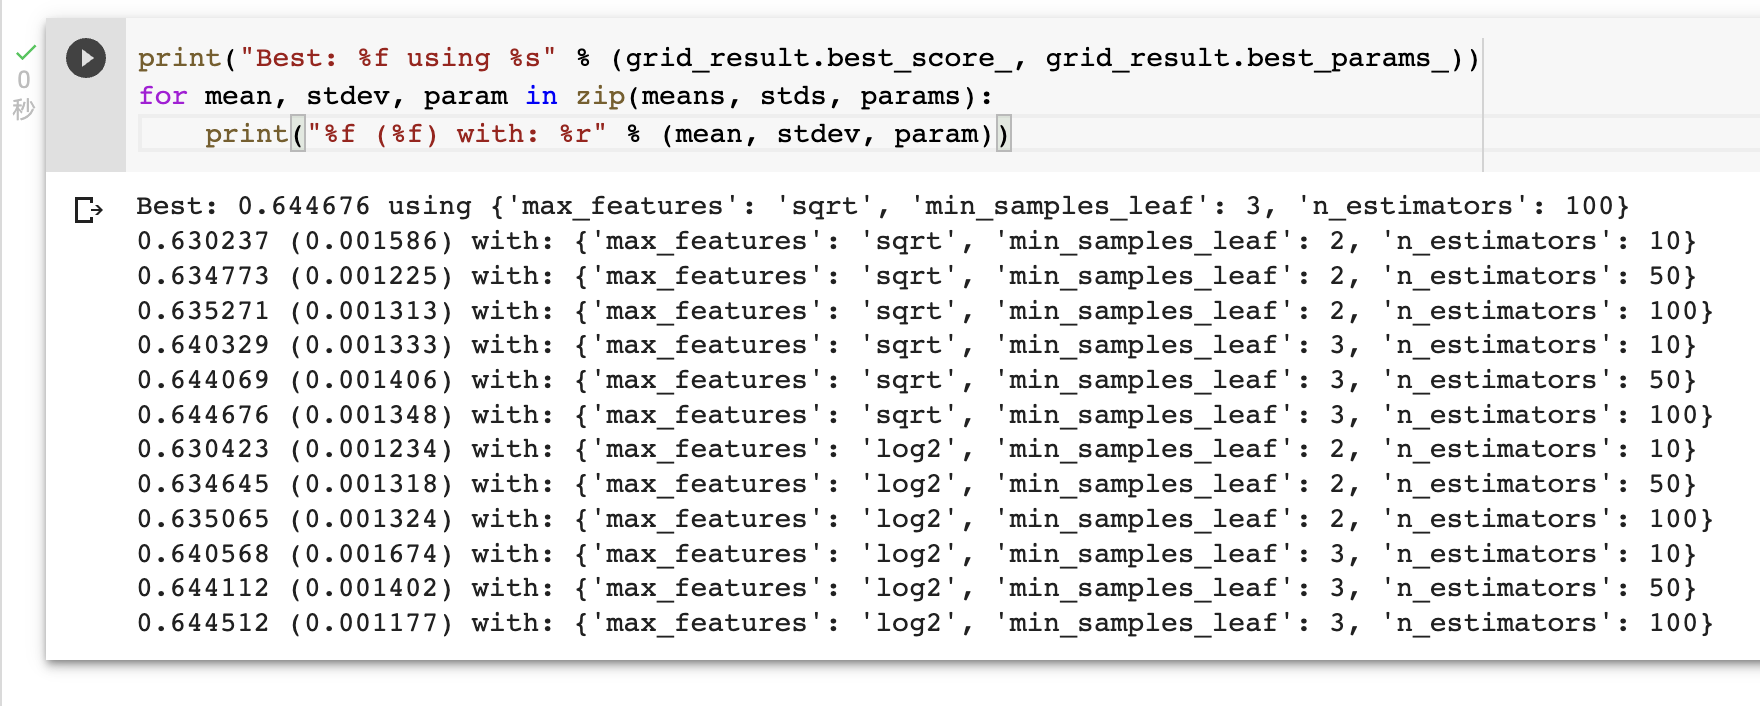

In [95]:
from IPython import display
display.Image('/Users/shawnho/Downloads/Random forest hyper.png')

## Hyperparamter Tuning Adjustment Accuracy

### Naive Bayes

In [96]:
nb_HT = MultinomialNB(alpha=10, fit_prior=True)
hyper_accuracy = {}

kf = KFold(n_splits=5, random_state=None) 
result = cross_val_score(nb_HT , train_dtm, train.stars, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
hyper_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.69070905 0.69577366 0.69251368 0.69338689 0.69756069]
Avg accuracy: 0.6939887945126513


### Multinomial Logistic Regression

In [97]:
MLR_HT = LogisticRegression(C=0.1, penalty='l2',
                               solver='saga')
result = cross_val_score(MLR_HT , train_dtm_numeric, train.stars, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
hyper_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.75090232 0.75590872 0.75200838 0.75061125 0.75589451]
Avg accuracy: 0.7530650354466188


### Decision Tree

In [98]:
model_HP = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf= 5)
result = cross_val_score(model_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
hyper_accuracy['DT'] = pd.Series(result.mean())[0]

[0.66914579 0.66965124 0.6702255  0.66868849 0.66874007]
Avg accuracy: 0.6692902172494376


### Classification tree

In [99]:
clf_tree_HP = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf= 10)
result = cross_val_score(clf_tree_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
hyper_accuracy['CF'] = pd.Series(result.mean())[0]

[0.66778416 0.66844434 0.66741969 0.67058654 0.67347486]
Avg accuracy: 0.6695419194394475


### Random forest

In [100]:
rf_reg_HP = RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_leaf= 3)
result = cross_val_score(rf_reg_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
hyper_accuracy['RF'] = pd.Series(result.mean())[0]

[0.6431305  0.64304798 0.6435807  0.64514865 0.64760372]
Avg accuracy: 0.644502308228681


## Accuracy

In [101]:
model_map_3 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
hyper_accuracy_ = {model_map_3[k]: v for k, v in hyper_accuracy.items() if model_map_3.get(k)}

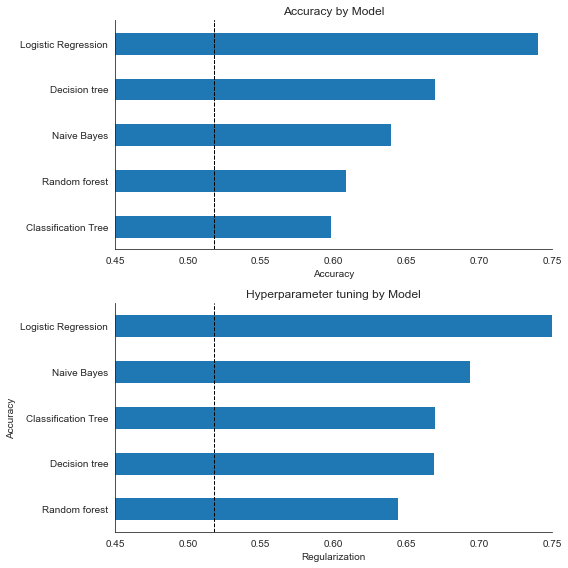

In [102]:
fig, axes = plt.subplots(2, figsize=(8, 8))
left = pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.45, .75), title='Accuracy by Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')

pd.Series(hyper_accuracy_).sort_values().plot.barh(
    ax=axes[1], xlim=(.45, .75), title='Hyperparameter tuning by Model')
axes[1].axvline(naive_benchmark, ls='--', lw=1, c='k')

axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')
axes[1].set_xlabel('Regularization')
axes[1].set_ylabel('Accuracy')
axes[0].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## Cross Validation the new model

In [103]:
crosshyper_accuracy = {}

kf = KFold(n_splits=5, random_state=None) 
result = cross_val_score(nb_HT , train_dtm, train.stars, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
crosshyper_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.69070905 0.69577366 0.69251368 0.69338689 0.69756069]
Avg accuracy: 0.6939887945126513


In [104]:
result = cross_val_score(MLR_HT , train_dtm_numeric, train.stars, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
crosshyper_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.75119339 0.75579229 0.75218302 0.7508441  0.75589451]
Avg accuracy: 0.7531814634359075


In [105]:
result = cross_val_score(model_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
crosshyper_accuracy['DT'] = pd.Series(result.mean())[0]

[0.6694243  0.6696925  0.6702255  0.67088568 0.66816241]
Avg accuracy: 0.6696780773724482


In [106]:
result = cross_val_score(clf_tree_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
crosshyper_accuracy['CF'] = pd.Series(result.mean())[0]

[0.66923862 0.66604087 0.66958594 0.66807988 0.67304161]
Avg accuracy: 0.6691973854892737


In [107]:
result = cross_val_score(rf_reg_HP , x_train, y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
crosshyper_accuracy['RF'] = pd.Series(result.mean())[0]

[0.6429964  0.64343996 0.64386953 0.64518991 0.64773782]
Avg accuracy: 0.6446467239455356


In [108]:
model_map_3 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
crosshyper_accuracy_ = {model_map_3[k]: v for k, v in crosshyper_accuracy.items() if model_map_3.get(k)}

## To the dataframe

In [109]:
df_1 = pd.DataFrame.from_dict(accuracy_, orient ='index')
df_1 = df_1.rename({0: "Original Model"}, axis=1)
df_2 = pd.DataFrame.from_dict(cross_accuracy_, orient ='index')
df_2 = df_2.rename({0: "Cross Validation"}, axis=1)
df_3 = pd.DataFrame.from_dict(hyper_accuracy_, orient ='index')
df_3 = df_3.rename({0: "Hyperparameter tuning"}, axis=1)
df_4 = pd.DataFrame.from_dict(crosshyper_accuracy_, orient ='index')
df_4 = df_4.rename({0: "Hyperparameter tuning Cross Validation"}, axis=1)

In [110]:
Comparison = pd.concat([df_1, df_2, df_3, df_4], axis=1)
Comparison

,Original Model,Cross Validation,Hyperparameter tuning,Hyperparameter tuning Cross Validation
Naive Bayes,0.639694,0.673381,0.693989,0.693989
Logistic Regression,0.740629,0.715528,0.753065,0.753181
Decision tree,0.669833,0.670264,0.669290,0.669678
Classification Tree,0.598284,0.596480,0.669542,0.669197
Random forest,0.608446,0.606960,0.644502,0.644647


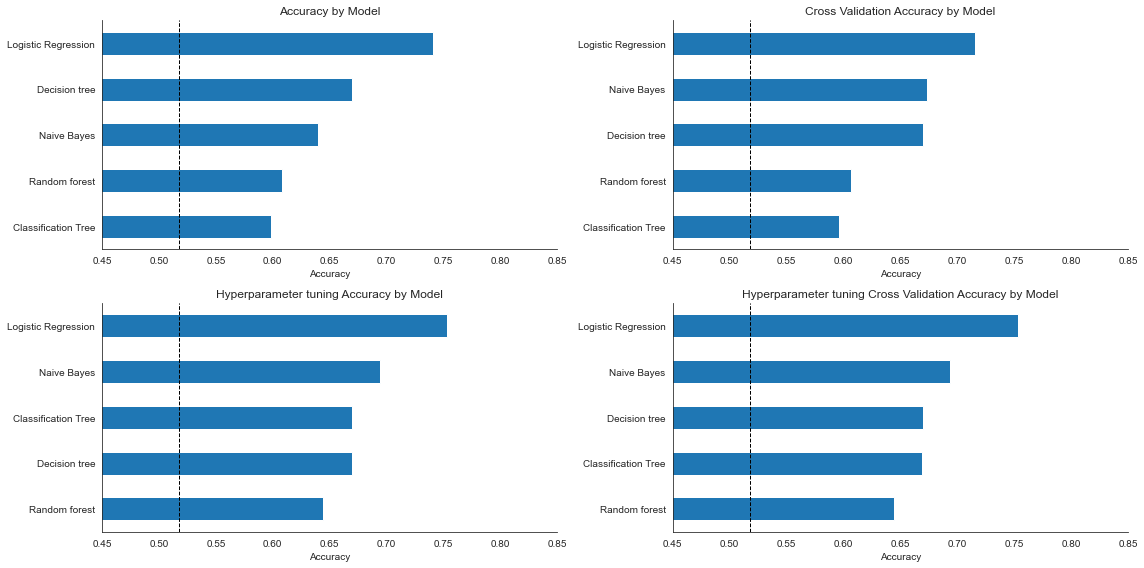

In [111]:
fig, axes = plt.subplots(2,2, figsize=(16, 8))
left = pd.Series(accuracy_).sort_values().plot.barh(
    ax=axes[0,0], xlim=(.45, .85), title='Accuracy by Model')
axes[0,0].axvline(naive_benchmark, ls='--', lw=1, c='k')

left = pd.Series(cross_accuracy_).sort_values().plot.barh(
    ax=axes[0,1], xlim=(.45, .85), title='Cross Validation Accuracy by Model')
axes[0,1].axvline(naive_benchmark, ls='--', lw=1, c='k')

left = pd.Series(hyper_accuracy_).sort_values().plot.barh(
    ax=axes[1,0], xlim=(.45, .85), title='Hyperparameter tuning Accuracy by Model')
axes[1,0].axvline(naive_benchmark, ls='--', lw=1, c='k')

pd.Series(crosshyper_accuracy_).sort_values().plot.barh(
    ax=axes[1,1], xlim=(.45, .85), title='Hyperparameter tuning Cross Validation Accuracy by Model')
axes[1,1].axvline(naive_benchmark, ls='--', lw=1, c='k')

#axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')
#axes[1,0].set_xlabel('Regularization')
axes[0,0].set_xlabel('Accuracy')
axes[0,1].set_xlabel('Accuracy')
axes[1,0].set_xlabel('Accuracy')
axes[1,1].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## Rotten Tomatoes

In [5]:
Tomatoes = pd.read_csv('/Users/shawnho/Downloads/Rotten Tomatoes Dataset/rotten_tomatoes_critic_reviews.csv', \
                       parse_dates=True)
Tomatoes

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [6]:
Tomatoes = Tomatoes.dropna()
Tomatoes = Tomatoes[Tomatoes["review_score"].str.contains("A") == False]
Tomatoes = Tomatoes[Tomatoes["review_score"].str.contains("B") == False]
Tomatoes = Tomatoes[Tomatoes["review_score"].str.contains("C") == False]
Tomatoes = Tomatoes[Tomatoes["review_score"].str.contains("D") == False]
Tomatoes = Tomatoes[Tomatoes["review_score"].str.contains("E") == False]
Tomatoes

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on..."
...,...,...,...,...,...,...,...,...
1129999,m/zulu,Pablo Villaça,False,Cinema em Cena,Fresh,3/5,2009-05-01,"Responsvel por lanar a carreira de Caine, o fi..."
1130000,m/zulu,Scott Nash,False,Three Movie Buffs,Fresh,3/4,2015-05-30,The old-fashioned war epic that made Michael C...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."


In [7]:
Tomatoes[['First','Last']] = Tomatoes["review_score"].str.split('/', expand=True)
Tomatoes

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,First,Last
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,3.5,5
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,1,4
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",3.5,5
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an...",3,5
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on...",4,5
...,...,...,...,...,...,...,...,...,...,...
1129999,m/zulu,Pablo Villaça,False,Cinema em Cena,Fresh,3/5,2009-05-01,"Responsvel por lanar a carreira de Caine, o fi...",3,5
1130000,m/zulu,Scott Nash,False,Three Movie Buffs,Fresh,3/4,2015-05-30,The old-fashioned war epic that made Michael C...,3,4
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.,5,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme...",3.5,5


In [8]:
Tomatoes.groupby(Tomatoes["Last"]).count()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,First
Last,,,,,,,,,
0,1,1,1,1,1,1,1,1,1
00,1,1,1,1,1,1,1,1,1
1,9,9,9,9,9,9,9,9,9
10,65486,65486,65486,65486,65486,65486,65486,65486,65486
100,5926,5926,5926,5926,5926,5926,5926,5926,5926
1000,1,1,1,1,1,1,1,1,1
11,10,10,10,10,10,10,10,10,10
13,1,1,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1,1,1


In [14]:
Tomatoes = Tomatoes[Tomatoes["Last"].str.contains("5") == True]
Tomatoes = Tomatoes[(Tomatoes["First"] =="0") | (Tomatoes["First"] =="0.5") | \
                    (Tomatoes["First"] =="1") | (Tomatoes["First"] =="1.5") | \
                    (Tomatoes["First"] =="2") | (Tomatoes["First"] =="2.5") | \
                    (Tomatoes["First"] =="3") | (Tomatoes["First"] =="3.5") | \
                    (Tomatoes["First"] =="4") | (Tomatoes["First"] =="4.5") | \
                    (Tomatoes["First"] =="5")]
Tomatoes 

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,First,Last
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,3.5,5
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",3.5,5
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an...",3,5
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on...",4,5
12,m/0814255,David Jenkins,True,Time Out,Rotten,2/5,2010-02-10,Chris Columbus returns to his comfort zone for...,2,5
...,...,...,...,...,...,...,...,...,...,...
1129996,m/zulu,Christopher Null,False,Filmcritic.com,Fresh,3/5,2006-01-31,"Though, there's an awful lot of lounging aroun...",3,5
1129999,m/zulu,Pablo Villaça,False,Cinema em Cena,Fresh,3/5,2009-05-01,"Responsvel por lanar a carreira de Caine, o fi...",3,5
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.,5,5
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme...",3.5,5


In [117]:
Tomatoes['date'] = pd.to_datetime(Tomatoes['review_date'], errors='coerce')

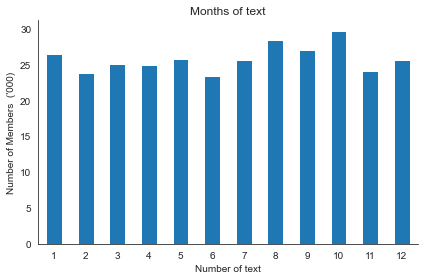

In [118]:
Tomatoes["month"] = Tomatoes.date.dt.month

ax = Tomatoes.month.value_counts().div(1000).sort_index().plot.bar(title='Months of text',
                                                                            rot=0)
ax.set_xlabel('Number of text')
ax.set_ylabel("Number of Members  ('000)")
sns.despine()
plt.tight_layout()

## Prepare the data

### Text and Combined feature

In [119]:
Tomatoes_train = Tomatoes[Tomatoes.month < 7].sample(frac=.25)
Tomatoes_test = Tomatoes[Tomatoes.month > 6]

In [120]:
Tomatoes_train_dtm = vectorizer.fit_transform(Tomatoes_train.review_content)
Tomatoes_train_dtm

<37362x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 383566 stored elements in Compressed Sparse Row format>

In [121]:
Tomatoes_test_dtm = vectorizer.transform(Tomatoes_test.review_content)

#### Dummies

In [122]:
df_tom = pd.concat([Tomatoes_train[['top_critic', 'review_type']].assign(source='train'),
                Tomatoes_test[['top_critic', 'review_type']].assign(source='test')])

In [123]:
uniques_tom = df_tom.nunique()
binned_tom = pd.concat([(df_tom.loc[:, uniques_tom[uniques_tom > 20].index]
                     .apply(pd.qcut, q=10, labels=False, duplicates='drop')),
                    df_tom.loc[:, uniques_tom[uniques_tom <= 20].index]], axis=1)
binned_tom.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197654 entries, 915239 to 1130004
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   top_critic   197654 non-null  bool  
 1   review_type  197654 non-null  object
 2   source       197654 non-null  object
dtypes: bool(1), object(2)
memory usage: 4.7+ MB


In [124]:
dummies_tom = pd.get_dummies(binned_tom, 
                         columns=binned_tom.columns.drop('source'), 
                         drop_first=True)
dummies_tom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197654 entries, 915239 to 1130004
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   source              197654 non-null  object
 1   top_critic_True     197654 non-null  uint8 
 2   review_type_Rotten  197654 non-null  uint8 
dtypes: object(1), uint8(2)
memory usage: 3.4+ MB


In [125]:
Tomatoes_train_dummies = dummies_tom[dummies_tom.source=='train'].drop('source', axis=1)
Tomatoes_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37362 entries, 915239 to 902780
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   top_critic_True     37362 non-null  uint8
 1   review_type_Rotten  37362 non-null  uint8
dtypes: uint8(2)
memory usage: 364.9 KB


In [126]:
Tomatoes_train_numeric = sparse.csr_matrix(Tomatoes_train_dummies.astype(np.uint8))
Tomatoes_train_numeric.shape

(37362, 2)

In [127]:
Tomatoes_train_dtm_numeric = sparse.hstack((Tomatoes_train_dtm, Tomatoes_train_numeric))
Tomatoes_train_dtm_numeric.shape

(37362, 10002)

In [128]:
Tomatoes_test_dummies = dummies_tom[dummies_tom.source=='test'].drop('source', axis=1)
Tomatoes_test_numeric = sparse.csr_matrix(Tomatoes_test_dummies.astype(np.int8))
Tomatoes_test_dtm_numeric = sparse.hstack((Tomatoes_test_dtm, Tomatoes_test_numeric))
Tomatoes_test_dtm_numeric.shape

(160292, 10002)

### Benchmark

In [129]:
accuracy_ben, runtime_ben = {}, {}
predictions_ben = Tomatoes_test[['First']].copy()
naive_prediction_ben = np.full_like(predictions_ben.First,
                                fill_value=Tomatoes_train.First.mode().iloc[0])
naive_benchmark_ben = accuracy_score(predictions_ben.First, naive_prediction_ben)

In [130]:
naive_benchmark_ben

0.24483442717041398

### Train and test data for classification

In [131]:
Tomatoes["top_critic"] = pd.get_dummies(Tomatoes['top_critic'], drop_first=True)
Tomatoes["review_type"] = pd.get_dummies(Tomatoes['review_type'], drop_first=True)

In [132]:
Tomatoes['sentiment'] = Tomatoes.review_content.apply(detect_sentiment) 

In [133]:
Tomatoes_x_train, Tomatoes_x_test, Tomatoes_y_train, Tomatoes_y_test = \
train_test_split(Tomatoes[["sentiment", "top_critic", "review_type"]], 
                 Tomatoes[["First"]], test_size=0.3, random_state=0)

## Test our hyperparameter tuning models

### Naive Bayes

In [134]:
Tomatoes_train_dtm

<37362x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 383566 stored elements in Compressed Sparse Row format>

In [135]:
rotten_accuracy = {}

result = cross_val_score(nb_HT , Tomatoes_train_dtm, Tomatoes_train.First, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
rotten_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.33092466 0.33667871 0.33672377 0.33712527 0.34395075]
Avg accuracy: 0.3370806316013881


In [136]:
result = cross_val_score(MLR_HT , Tomatoes_train_dtm_numeric, Tomatoes_train.First, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
rotten_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.44854811 0.4547036  0.44379015 0.44499465 0.44807281]
Avg accuracy: 0.44802186157103474


In [137]:
result = cross_val_score(model_HP , Tomatoes_x_train, Tomatoes_y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
rotten_accuracy['DT'] = pd.Series(result.mean())[0]

[0.39936353 0.3732128  0.4020155  0.3840832  0.372691  ]
Avg accuracy: 0.3862732071497483


In [138]:
result = cross_val_score(clf_tree_HP , Tomatoes_x_train, Tomatoes_y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
rotten_accuracy['CF'] = pd.Series(result.mean())[0]

[0.38714141 0.40588968 0.4022461  0.39948804 0.40359292]
Avg accuracy: 0.3996716312192955


In [139]:
result = cross_val_score(rf_reg_HP , Tomatoes_x_train, Tomatoes_y_train, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
rotten_accuracy['RF'] = pd.Series(result.mean())[0]

[0.39408265 0.39339083 0.39186883 0.39316929 0.39561377]
Avg accuracy: 0.3936250750994553


In [140]:
model_map_4 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
rotten_accuracy_ = {model_map_4[k]: v for k, v in rotten_accuracy.items() if model_map_4.get(k)}

In [141]:
rotten_accuracy_

{'Naive Bayes': 0.3370806316013881,
 'Logistic Regression': 0.44802186157103474,
 'Decision tree': 0.3862732071497483,
 'Classification Tree': 0.3996716312192955,
 'Random forest': 0.3936250750994553}

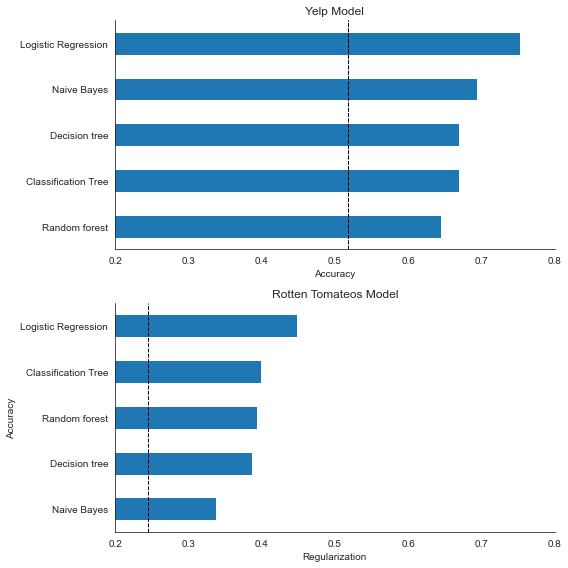

In [142]:
fig, axes = plt.subplots(2, figsize=(8, 8))
left = pd.Series(crosshyper_accuracy_).sort_values().plot.barh(
    ax=axes[0], xlim=(.2, .8), title='Yelp Model')
axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')

pd.Series(rotten_accuracy_).sort_values().plot.barh(
    ax=axes[1], xlim=(.2, .8), title='Rotten Tomateos Model')
axes[1].axvline(naive_benchmark_ben, ls='--', lw=1, c='k')

axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')
axes[1].set_xlabel('Regularization')
axes[1].set_ylabel('Accuracy')
axes[0].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## Term Frequency Inverse Document Frequency (TF-IDF)

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import nltk
import re
import string
from nltk.stem import WordNetLemmatizer

In [146]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shawnho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Yelp dataset

In [164]:
train_X_non = train[['text']]  
train_y = train[['stars']]   
test_X_non = test[['text']]
test_y = test[['stars']]

train_X=[]
test_X=[]

### Text Pre Processing

In [174]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/shawnho/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [176]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/shawnho/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [177]:
for i in range(0, len(train_X_non)):
    review = re.sub('[^a-zA-Z]', ' ', str(train_X_non.iloc[i,:]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    train_X.append(review)

In [179]:
for i in range(0, len(test_X_non)):
    review = re.sub('[^a-zA-Z]', ' ', str(test_X_non.iloc[i,:]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    test_X.append(review)

In [180]:
train_X[10]

'text burger super dry condiment even though came chipotle mayo waiter waitress sure stand around phone literally nothing ask someone something come super annoyed need refill go bar ask waste time money oh drinking glass disgustingly dirty name dtype object'

In [181]:
test_X[10]

'text food fantastic one favorite place seafood spice right many time say spicy used go joe crab shack love place much even spaghetti really good server management nice wait go back name dtype object'

In [182]:
tf_idf = TfidfVectorizer()

In [183]:
X_train_tf = tf_idf.fit_transform(train_X)

In [184]:
X_train_tf = tf_idf.transform(train_X)

In [185]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 85889, n_features: 48611


In [186]:
X_test_tf = tf_idf.transform(test_X)

In [187]:
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 348890, n_features: 48611


### Model Creation

#### Naive Bayes

In [188]:
nb_TFIDF1 = nb_HT.fit(X_train_tf, train_y)

In [189]:
y_pred_1 = nb_HT.predict(X_test_tf)

In [193]:
print(metrics.classification_report(test_y, y_pred_1))

              precision    recall  f1-score   support

           1       0.96      0.09      0.16     73102
           2       0.00      0.00      0.00     23944
           3       0.00      0.00      0.00     25067
           4       0.00      0.00      0.00     46127
           5       0.53      1.00      0.69    180650

    accuracy                           0.54    348890
   macro avg       0.30      0.22      0.17    348890
weighted avg       0.47      0.54      0.39    348890



In [194]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred_1))

Confusion matrix:
[[  6276      0      0      0  66826]
 [   233      0      0      0  23711]
 [    35      0      0      0  25032]
 [     9      0      0      0  46118]
 [    11      0      0      0 180639]]


In [195]:
TFIDF_accuracy = {}
result = cross_val_score(nb_HT , X_train_tf, train_y, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.55093725 0.5490744  0.5494819  0.5511701  0.54992141]
Avg accuracy: 0.5501170092141872


### Multinomial logistic regression

In [237]:
nb_TFIDF2 = MLR_HT.fit(X_train_tf, train_y)

In [238]:
y_pred_2 = MLR_HT.predict(X_test_tf)

In [239]:
print(metrics.classification_report(test_y, y_pred_2))

              precision    recall  f1-score   support

           1       0.71      0.86      0.78     73102
           2       0.43      0.03      0.06     23944
           3       0.49      0.08      0.13     25067
           4       0.44      0.15      0.23     46127
           5       0.73      0.97      0.83    180650

    accuracy                           0.71    348890
   macro avg       0.56      0.42      0.41    348890
weighted avg       0.65      0.71      0.64    348890



In [240]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred_2))

Confusion matrix:
[[ 62519    509    408    518   9148]
 [ 13109    808   1101   1510   7416]
 [  6221    493   1934   4392  12027]
 [  2309     70    478   7132  36138]
 [  3373     19     60   2683 174515]]


In [241]:
result = cross_val_score(MLR_HT , X_train_tf, train_y, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.71591571 0.7134125  0.71271394 0.71457678 0.71060139]
Avg accuracy: 0.7134440633529582


### Decision Tree

In [201]:
nb_TFIDF3 = model_HP.fit(X_train_tf, train_y)

In [202]:
y_pred_3 = model_HP.predict(X_test_tf)

In [203]:
print(metrics.classification_report(test_y, y_pred_3))

              precision    recall  f1-score   support

           1       0.43      0.00      0.00     73102
           2       0.07      0.00      0.00     23944
           3       0.23      0.00      0.01     25067
           4       0.32      0.00      0.01     46127
           5       0.52      1.00      0.68    180650

    accuracy                           0.52    348890
   macro avg       0.31      0.20      0.14    348890
weighted avg       0.42      0.52      0.36    348890



In [204]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred_3))

Confusion matrix:
[[    54      2    114     32  72900]
 [    20      2     95     35  23792]
 [    14      7    103     36  24907]
 [    10      8     61    138  45910]
 [    27     10     75    192 180346]]


In [257]:
result = cross_val_score(model_HP , X_train_tf, train_y, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_accuracy['DT'] = pd.Series(result.mean())[0]

[0.54465013 0.54290371 0.5407498  0.55402259 0.53955871]
Avg accuracy: 0.5443769886914918


### Classification Tree

In [206]:
nb_TFIDF4 = clf_tree_HP.fit(X_train_tf, train_y)

In [207]:
y_pred_4 = clf_tree_HP.predict(X_test_tf)

In [208]:
print(metrics.classification_report(test_y, y_pred_4))

              precision    recall  f1-score   support

           1       0.43      0.05      0.09     73102
           2       0.00      0.00      0.00     23944
           3       0.00      0.00      0.00     25067
           4       0.13      0.00      0.00     46127
           5       0.52      0.99      0.68    180650

    accuracy                           0.52    348890
   macro avg       0.22      0.21      0.16    348890
weighted avg       0.38      0.52      0.37    348890



In [209]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred_4))

Confusion matrix:
[[  3754      0      0      0  69348]
 [  1011      0      0      3  22930]
 [   815      0      0      4  24248]
 [   861      0      0     11  45255]
 [  2270      0      0     66 178314]]


In [210]:
result = cross_val_score(clf_tree_HP , X_train_tf, train_y, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_accuracy['CF'] = pd.Series(result.mean())[0]

[0.54441728 0.54499942 0.54208872 0.54482478 0.54898993]
Avg accuracy: 0.5450640236340482


### Random Forest

In [211]:
nb_TFIDF5 = rf_reg_HP.fit(X_train_tf, train_y)

In [212]:
y_pred_5 = rf_reg_HP.predict(X_test_tf)

In [213]:
print(metrics.classification_report(test_y, y_pred_5))

              precision    recall  f1-score   support

           1       0.75      0.73      0.74     73102
           2       0.00      0.00      0.00     23944
           3       0.42      0.00      0.00     25067
           4       0.42      0.00      0.00     46127
           5       0.64      0.99      0.78    180650

    accuracy                           0.66    348890
   macro avg       0.45      0.34      0.30    348890
weighted avg       0.58      0.66      0.56    348890



In [214]:
print("Confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred_5))

Confusion matrix:
[[ 53384      0      0      1  19717]
 [  9543      0      9      4  14388]
 [  4161      0      8     20  20878]
 [  1504      0      2     19  44602]
 [  2578      0      0      1 178071]]


In [215]:
result = cross_val_score(rf_reg_HP , X_train_tf, train_y, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_accuracy['RF'] = pd.Series(result.mean())[0]

[0.67953196 0.67458377 0.67295378 0.6751077  0.67386622]
Avg accuracy: 0.6752086839703859


## Rotten Tomateos 

In [222]:
train_X_non_rt = Tomatoes_train[['review_content']]  
train_y_rt = Tomatoes_train[['First']]
test_X_non_rt = Tomatoes_test[['review_content']]
test_y_rt = Tomatoes_test[['First']]

train_X_rt=[]
test_X_rt=[]

### Text Pre Processing

In [224]:
for i in range(0, len(train_X_non_rt)):
    review = re.sub('[^a-zA-Z]', ' ', str(train_X_non_rt.iloc[i,:]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    train_X_rt.append(review)

In [225]:
for i in range(0, len(test_X_non_rt)):
    review = re.sub('[^a-zA-Z]', ' ', str(test_X_non_rt.iloc[i,:]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    test_X_rt.append(review)

In [226]:
tf_idf_rt = TfidfVectorizer()
X_train_tf_rt = tf_idf_rt.fit_transform(train_X_rt)
X_train_tf_rt = tf_idf_rt.transform(train_X_rt)
print("n_samples: %d, n_features: %d" % X_train_tf_rt.shape)
X_test_tf_rt = tf_idf_rt.transform(test_X_rt)
print("n_samples: %d, n_features: %d" % X_test_tf_rt.shape)

n_samples: 37362, n_features: 33277
n_samples: 160292, n_features: 33277


### Model Creation

#### Naive Bayes

In [264]:
TFIDF_rf_accuracy = {}
result = cross_val_score(nb_HT , X_train_tf_rt, train_y_rt, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_rf_accuracy['LDA'] = pd.Series(result.mean())[0]

[0.30389402 0.30389402 0.30045503 0.30366702 0.29081906]
Avg accuracy: 0.3005458300846645


#### Multinomial logistic regression

In [268]:
result = cross_val_score(MLR_HT , X_train_tf_rt, train_y_rt, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_rf_accuracy['MLR'] = pd.Series(result.mean())[0]

[0.32811455 0.33186137 0.3254818  0.32521413 0.3246788 ]
Avg accuracy: 0.32707012912437666


#### Decision tree

In [269]:
result = cross_val_score(model_HP , X_train_tf_rt, train_y_rt, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_rf_accuracy['DT'] = pd.Series(result.mean())[0]

[0.24555065 0.24407868 0.24451285 0.24397752 0.24330835]
Avg accuracy: 0.2442856094932478


#### Classification tree

In [270]:
result = cross_val_score(clf_tree_HP , X_train_tf_rt, train_y_rt, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_rf_accuracy['CF'] = pd.Series(result.mean())[0]

[0.2424729  0.24300816 0.24384368 0.24397752 0.24732334]
Avg accuracy: 0.2441251209564998


#### Random forest

In [271]:
result = cross_val_score(rf_reg_HP , X_train_tf_rt, train_y_rt, cv = kf)

print(result)
print("Avg accuracy: {}".format(result.mean()))
TFIDF_rf_accuracy['RF'] = pd.Series(result.mean())[0]

[0.33788305 0.33319952 0.33123662 0.33056745 0.33471627]
Avg accuracy: 0.3335205813018229


### Comparision

In [258]:
model_map_5 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
TFIDF_accuracy_ = {model_map_5[k]: v for k, v in TFIDF_accuracy.items() if model_map_5.get(k)}

In [273]:
model_map_6 = {'LDA': 'Naive Bayes',
             'MLR': 'Logistic Regression',
             'DT': 'Decision tree',
            'CF': 'Classification Tree',
            'RF': 'Random forest'}
TFIDF_rf_accuracy_ = {model_map_6[k]: v for k, v in TFIDF_rf_accuracy.items() if model_map_6.get(k)}

In [274]:
TFIDF_rf_accuracy_

{'Naive Bayes': 0.3005458300846645,
 'Logistic Regression': 0.32707012912437666,
 'Decision tree': 0.2442856094932478,
 'Classification Tree': 0.2441251209564998,
 'Random forest': 0.3335205813018229}

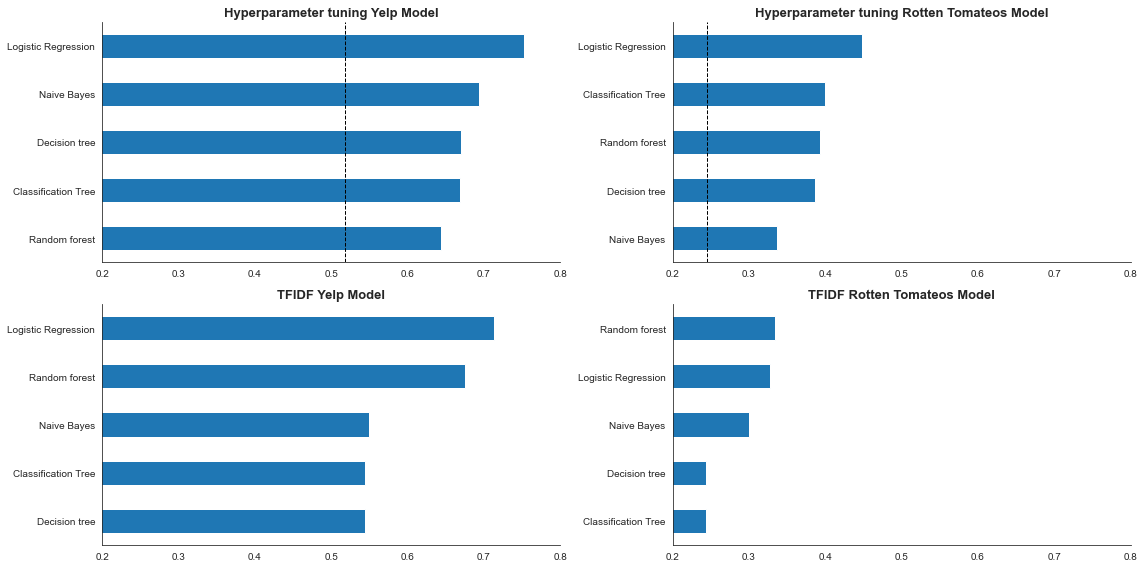

In [283]:
fig, axes = plt.subplots(2,2, figsize=(16, 8))
pd.Series(crosshyper_accuracy_).sort_values().plot.barh(
    ax=axes[0,0], xlim=(.2, .8))
axes[0,0].axvline(naive_benchmark, ls='--', lw=1, c='k')
axes[0,0].set_title('Hyperparameter tuning Yelp Model',fontweight="bold", size=13)

left = pd.Series(TFIDF_accuracy_).sort_values().plot.barh(
    ax=axes[1,0], xlim=(.2, .8))
axes[1,0].set_title('TFIDF Yelp Model',fontweight="bold", size=13)

left = pd.Series(rotten_accuracy_).sort_values().plot.barh(
    ax=axes[0,1], xlim=(.2, .8))
axes[0,1].axvline(naive_benchmark_ben, ls='--', lw=1, c='k')
axes[0,1].set_title('Hyperparameter tuning Rotten Tomateos Model',fontweight="bold", size=13)

pd.Series(TFIDF_rf_accuracy_).sort_values().plot.barh(
    ax=axes[1,1], xlim=(.2, .8))
axes[1,1].set_title('TFIDF Rotten Tomateos Model',fontweight="bold", size=13)

#axes[0].axvline(naive_benchmark, ls='--', lw=1, c='k')
#axes[1,0].set_xlabel('Regularization')
#axes[0,0].set_xlabel('Accuracy')
#axes[0,1].set_xlabel('Accuracy')
#axes[1,0].set_xlabel('Accuracy')
#axes[1,1].set_xlabel('Accuracy')
sns.despine()
fig.tight_layout()

## Textblob

#### Group by stars

In [307]:
import spacy

In [308]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
Have_text = b_pandas[b_pandas['text'].notna()]

In [318]:
def lemmatize(text):
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords]
    return lemma_list

### 3 hrs

In [326]:
Have_text['clean'] = Have_text['text'].apply(lemmatize)
Have_text.head(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean
0,0,b'742gQ1wvbOY1ASV46EgsMw',b'_5ebIlD6-kN7jCKsKQ5xfg',b'3Z59UMun90xRiSU1XX8rhQ',5,0,0,0,"We have been ordering here for the last few years. I will not go anywhere else for Chinese food. Our food is always fresh and delicious. The shrimp and vegetables is great, veggies are always crisp and shrimp is fresh not mushy!",2020-12-04 22:20:16,"[order, last, year, go, anywhere, else, chinese, food, food, always, fresh, delicious, shrimp, vegetable, great, veggie, always, crisp, shrimp, fresh, mushy]"
1,1,b'iBUJvIOkToh2ZECVNq5PDg',b'iAD32p6h32eKDVxsPHSRHA',b'YB26JvvGS2LgkxEKOObSAw',5,0,0,0,"I've been eating at this restaurant for over 5 years, and it is a staple in me abs my families lives. Really good quality and even better prices. I can't eat here without getting the gyoza. The sauce is so good I could drink it. I don't typically order crunchy rolls, but theirs isn't a traditional roll with snow crab and crunchies. Theirs has spicy crunchy shrimp and crab stick. Delicious little spot!",2021-01-08 01:49:36,"[eat, restaurant, year, staple, ab, family, live, really, good, quality, even, well, price, ca, eat, without, get, gyoza, sauce, good, could, drink, typically, order, crunchy, roll, traditional, roll, snow, crab, crunchie, spicy, crunchy, shrimp, crab, stick, delicious, little, spot]"
2,2,b'HgEofz6qEQqKYPT7YLA34w',b'rYvWv-Ny16b1lMcw1IP7JQ',b'jfIwOEXcVRyhZjM4ISOh4g',1,0,0,0,"How does a delivery person from here get lost , have they not heard of Google maps? Our food was room temp on the verge of cold by the time we received it an hour and a half after ordering. Will not be ordering again. What happened to melting cheese back in the day? Now with excellent navigation we get cold food.",2021-01-02 00:19:00,"[delivery, person, get, lose, hear, google, map, food, room, temp, verge, cold, time, receive, hour, half, order, order, happen, melt, cheese, back, day, excellent, navigation, get, cold, food]"
3,3,b'milJ7UH4Od9pBe2gWac9tA',b'v7i4M7NIx3bMNMChaXjU7Q',b'raKflkp3CANr8N7qpQ3ZyQ',5,0,0,0,I WISH I was still a Sierra resident. They're definitely one of the best property management companies in Isla Vista (and that's saying something). They're super easy to work with and they are GREAT in comparison to other landlords in IV that will try to take every last dime you have to give.,2021-02-02 18:14:15,"[wish, still, sierra, resident, definitely, one, good, property, management, company, isla, vista, say, something, super, easy, work, great, comparison, landlord, iv, try, take, every, last, dime, give]"
4,4,b'Kxo5d6EOnOE-vERwQf2a1w',b'2ntnbUia9Bna62W0fqNcxg',b'S-VD26LE_LeJNx5nASk_pw',5,0,0,0,"The service is always good, the employees are nice! And vegan African food? I loveeeeee. And the portions? So sturdy",2021-01-26 18:01:45,"[service, always, good, employee, nice, vegan, african, food, loveeeeee, portion, sturdy]"
5,5,b'STqHwh6xd05bgS6FoAgRqw',b'j4qNLF-VNRF2DwBkUENW-w',b'yE1raqkLX7OZsjmX3qKIKg',5,0,0,0,two words: whipped. feta. \nexplosion of amazingness hit your taste buds. I seriously go just for this. But their appetizer - small plates split between a group is a great way to try a bunch of their food all at once. Also just a cozy atmosphere. \nbut again: whipped. feta. warm. pita.,2021-01-27 23:28:03,"[two, word, whip, feta, explosion, amazingness, hit, taste, bud, seriously, go, appetizer, small, plate, split, group, great, way, try, bunch, food, also, cozy, atmosphere, whip, feta, warm, pita]"
6,6,b'XGG_tdjW5jvUh19RsizEsw',b'ZvMGwhkxi3zjJ9KsVYHVOw',b'ySSOZ_fz7wMhfjhWKzdR-w',5,0,0,0,"Sheesh!!!! What to say about this elegant establishment, the service was great from the cashier attitude to the waitress handing me my food. The first bite from that double bacon cheeseburger was amazing. The buttery bread from the hot sizzling bacon and the beef patty. God himself made this burger with all his soul. My first bite took my breathe away from me i fell in l

In [350]:
Five_stars = Have_text[Have_text["stars"] == 5]
Four_stars = Have_text[Have_text["stars"] == 4]
Three_stars = Have_text[Have_text["stars"] == 3]
Two_stars = Have_text[Have_text["stars"] == 2]
One_stars = Have_text[Have_text["stars"] ==1]

#### One star

In [ ]:
word1 = []
for wordList in One_stars.clean:
    word1 += wordList

In [368]:
fdist1 = FreqDist(word1)

In [393]:
word1_lemma = []
word1_pos = []
for v in fdist1:
    token = nlp(v)
    for t in token:
        word1_lemma.append(t.lemma_)
        word1_pos.append(t.pos_)

In [433]:
word1_lemma_ = pd.DataFrame(word1_lemma)
word1_pos_ = pd.DataFrame(word1_pos)

In [435]:
word1_lemma_ = word1_lemma_.rename({0: "Lemma"}, axis=1)
word1_pos_ = word1_pos_.rename({0: "pos"}, axis=1)

In [436]:
One_stars_adj = pd.concat([word1_lemma_, word1_pos_], axis=1)

In [439]:
One_stars_adj_only= One_stars_adj[One_stars_adj["pos"] == "ADJ"]
One_stars_adj_only["stars"] = 1
One_stars_adj_only.head(5)

,Lemma,pos,stars
25,bad,ADJ,1
30,good,ADJ,1
51,rude,ADJ,1
65,new,ADJ,1
83,last,ADJ,1


#### Two stars

In [440]:
word2 = []
for wordList in Two_stars.clean:
    word2 += wordList
fdist2 = FreqDist(word2)

In [441]:
word2_lemma = []
word2_pos = []
for v in fdist2:
    token = nlp(v)
    for t in token:
        word2_lemma.append(t.lemma_)
        word2_pos.append(t.pos_)

In [442]:
word2_lemma_ = pd.DataFrame(word2_lemma)
word2_pos_ = pd.DataFrame(word2_pos)
word2_lemma_ = word2_lemma_.rename({0: "Lemma"}, axis=1)
word2_pos_ = word2_pos_.rename({0: "pos"}, axis=1)
Two_stars_adj = pd.concat([word2_lemma_, word2_pos_], axis=1)
Two_stars_adj_only= Two_stars_adj[Two_stars_adj["pos"] == "ADJ"]
Two_stars_adj_only["stars"] = 2
Two_stars_adj_only.head(5)

,Lemma,pos,stars
4,good,ADJ,2
30,great,ADJ,2
33,bad,ADJ,2
53,nice,ADJ,2
77,new,ADJ,2


#### Three stars

In [443]:
word3 = []
for wordList in Three_stars.clean:
    word3 += wordList
fdist3 = FreqDist(word3)

In [444]:
word3_lemma = []
word3_pos = []
for v in fdist3:
    token = nlp(v)
    for t in token:
        word3_lemma.append(t.lemma_)
        word3_pos.append(t.pos_)

In [447]:
word3_lemma_ = pd.DataFrame(word3_lemma)
word3_pos_ = pd.DataFrame(word3_pos)
word3_lemma_ = word3_lemma_.rename({0: "Lemma"}, axis=1)
word3_pos_ = word3_pos_.rename({0: "pos"}, axis=1)
Three_stars_adj = pd.concat([word3_lemma_, word3_pos_], axis=1)
Three_stars_adj_only= Three_stars_adj[Three_stars_adj["pos"] == "ADJ"]
Three_stars_adj_only["stars"] = 3
Three_stars_adj_only.head(5)

,Lemma,pos,stars
0,good,ADJ,3
13,great,ADJ,3
24,nice,ADJ,3
39,little,ADJ,3
57,bad,ADJ,3


#### Four stars

In [448]:
word4 = []
for wordList in Four_stars.clean:
    word4 += wordList
fdist4 = FreqDist(word4)

In [449]:
word4_lemma = []
word4_pos = []
for v in fdist4:
    token = nlp(v)
    for t in token:
        word4_lemma.append(t.lemma_)
        word4_pos.append(t.pos_)

In [450]:
word4_lemma_ = pd.DataFrame(word4_lemma)
word4_pos_ = pd.DataFrame(word4_pos)
word4_lemma_ = word4_lemma_.rename({0: "Lemma"}, axis=1)
word4_pos_ = word4_pos_.rename({0: "pos"}, axis=1)
Four_stars_adj = pd.concat([word4_lemma_, word4_pos_], axis=1)
Four_stars_adj_only= Four_stars_adj[Four_stars_adj["pos"] == "ADJ"]
Four_stars_adj_only["stars"] = 4
Four_stars_adj_only.head(5)

,Lemma,pos,stars
0,good,ADJ,4
4,great,ADJ,4
17,nice,ADJ,4
22,delicious,ADJ,4
23,little,ADJ,4


#### Five stars

In [451]:
word5 = []
for wordList in Five_stars.clean:
    word5 += wordList
fdist5 = FreqDist(word5)

In [452]:
word5_lemma = []
word5_pos = []
for v in fdist5:
    token = nlp(v)
    for t in token:
        word5_lemma.append(t.lemma_)
        word5_pos.append(t.pos_)

In [454]:
word5_lemma_ = pd.DataFrame(word5_lemma)
word5_pos_ = pd.DataFrame(word5_pos)
word5_lemma_ = word5_lemma_.rename({0: "Lemma"}, axis=1)
word5_pos_ = word5_pos_.rename({0: "pos"}, axis=1)
Five_stars_adj = pd.concat([word5_lemma_, word5_pos_], axis=1)
Five_stars_adj_only= Five_stars_adj[Five_stars_adj["pos"] == "ADJ"]
Five_stars_adj_only["stars"] = 5
Five_stars_adj_only.head(5)

,Lemma,pos,stars
0,good,ADJ,5
1,great,ADJ,5
13,amazing,ADJ,5
14,delicious,ADJ,5
22,friendly,ADJ,5


### merge the data

In [456]:
Adj = One_stars_adj_only.append([Two_stars_adj_only, Three_stars_adj_only, \
                                  Four_stars_adj_only, Five_stars_adj_only])

In [464]:
cross1 = pd.crosstab(Adj.Lemma, Adj.stars)

In [470]:
cross1.sort_values(by=3)

stars,1,2,3,4,5
Lemma,,,,,
aaaaaaaaaah,0,0,0,1,0
onse,1,0,0,0,0
onsen,0,0,0,1,0
onsie,0,0,0,1,0
onsight,0,0,0,0,1
...,...,...,...,...,...
high,3,3,3,3,3
large,3,2,3,3,3
young,3,3,3,3,3


## Vectorize

In [479]:
vectorizer = TfidfVectorizer(max_df=.25,
                             min_df=.01,
                             stop_words='english',
                             binary=False)
text_dtm = vectorizer.fit_transform(Have_text.text)
text_dtm

<692446x688 sparse matrix of type '<class 'numpy.float64'>'
	with 13938706 stored elements in Compressed Sparse Row format>

### Get token count¶

In [480]:
text_dtm.todense().sum(0)

matrix([[ 1854.18899844,  7704.16886845,  2111.19129001,  1997.43483941,
          3388.07526111,  3975.65622582,  1630.95157521,  4259.52146668,
          1617.44283366,  1898.44604543,  1983.39047791,  4673.09765374,
          6804.06887146,  2094.0262095 ,  3759.76907184,  2342.96988614,
          2110.8674087 ,  3026.40427712,  1824.45724521, 16725.99505395,
          2474.50639446,  1671.46145293,  1735.13735515,  2429.04173009,
          1906.09836586,  3963.81476784,  1806.99580332,  8497.9858716 ,
          1554.23434342,  3385.21270634,  4656.48389275,  7112.63631567,
          1634.64131087,  2791.41224374,  6929.87215381,  1738.69384631,
          4221.2000888 ,  1890.9753052 ,  2883.39172394,  2882.41858248,
          2000.45777891,  5503.84064618,  7451.98510124,  1917.34164132,
          2847.82653299,  6624.16648665,  1707.09911322,  7714.37366634,
          2537.30921319,  1858.05858802,  1390.18135163,  2839.03810134,
          2441.03608096,  4704.68857502,  3669.8324

In [481]:
text_token_count = text_dtm.sum(0).A.squeeze()
tokens = vectorizer.get_feature_names()
word_count = pd.Series(text_token_count,
                       index=tokens).sort_values(ascending=False)

[]

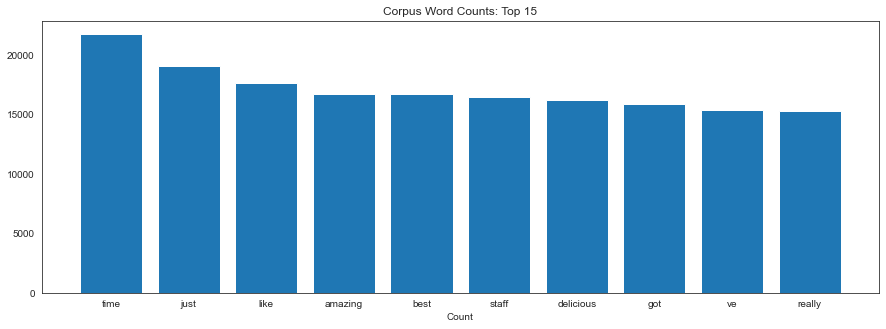

In [482]:
# Summng up counst and labelling words
plt.figure(figsize = (15, 5))
plt.title("Corpus Word Counts: Top 15")
plt.bar(word_count.head(10).index, word_count.head(10))
plt.xlabel("Word")
plt.xlabel("Count")
plt.plot()

## Latent Semantic Analysis

In [483]:
# Set the 
n_components = 5
topic_labels = ['Topic {}'.format(i) for i in range(1, n_components + 1)]

In [485]:
from sklearn.decomposition import TruncatedSVD

In [498]:
svd = TruncatedSVD(n_components=n_components, n_iter=5, random_state=42)
svd.fit(text_dtm)

TruncatedSVD(n_components=5, random_state=42)

In [499]:
svd

TruncatedSVD(n_components=5, random_state=42)

In [500]:
svd.singular_values_

array([163.13645403,  85.41736571,  76.79414952,  68.60337017,
        65.3457694 ])

In [501]:
svd.explained_variance_ratio_

array([0.00410259, 0.01091736, 0.00878702, 0.00704874, 0.00640124])

In [502]:
svd.explained_variance_ratio_.sum()

0.03725694943814002

### Topics weights of most frequent words¶

In [503]:
topics = pd.DataFrame(svd.components_.T, index=tokens, columns=stars)
topics.loc[word_count.head(10).index]

,1,2,3,4,5
time,0.180506,0.112357,0.049520,0.017200,0.087873
just,0.161037,0.099268,-0.074093,0.004808,-0.011717
like,0.147855,0.054463,-0.084826,0.002256,-0.079617
amazing,0.124892,-0.210084,0.221951,0.046558,0.351467
best,0.122338,-0.163321,0.117190,0.214356,0.282565
staff,0.124929,-0.094003,0.286309,0.014904,-0.292106
delicious,0.123873,-0.262115,-0.041081,-0.032241,-0.005943
got,0.133546,0.033866,-0.108193,-0.059665,0.055152
ve,0.124595,-0.020867,0.032155,0.111449,0.150915
really,0.126721,-0.046757,-0.023347,-0.031344,-0.134937


### Most important words by topic

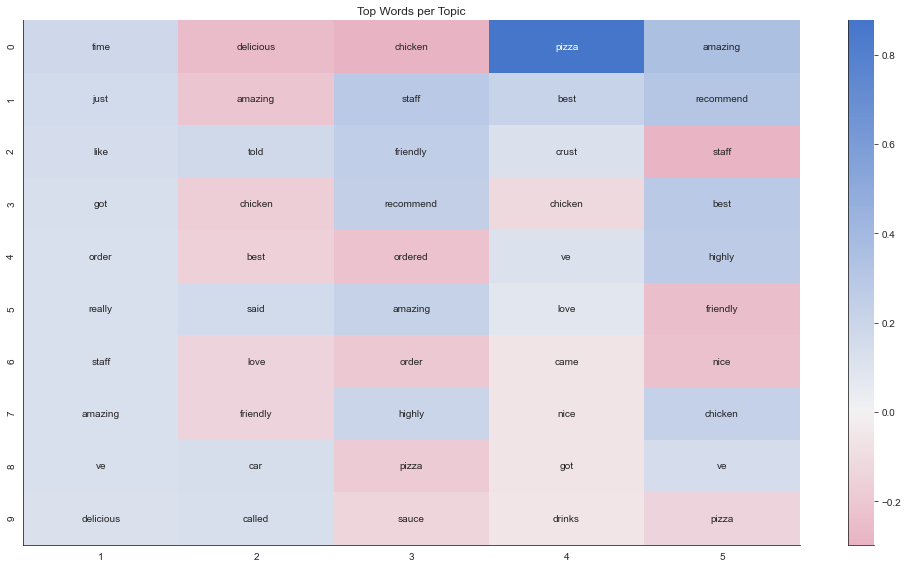

In [505]:
fig, ax = plt.subplots(figsize=(14, 8))
top_words, top_vals = pd.DataFrame(), pd.DataFrame()
for topic, words_ in topics.items():
    top10 = words_.abs().nlargest(10).index
    vals = words_.loc[top10].values
    top_vals[topic] = vals
    top_words[topic] = top10.tolist()
sns.heatmap(pd.DataFrame(top_vals),
            annot=top_words,
            fmt='',
            center=0,
            cmap=sns.diverging_palette(0, 255, sep=1, n=256),
            ax=ax)
ax.set_title('Top Words per Topic')
sns.despine()
fig.tight_layout()

### Evaluate Topic Coherence

In [508]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus

In [510]:
text_corpus = Sparse2Corpus(text_dtm, documents_columns=False)

In [513]:
LdaModel(corpus=text_corpus);

In [517]:
id2word = pd.Series(vectorizer.get_feature_names()).to_dict()

In [518]:
lda_gensim = LdaModel(corpus=text_corpus,
                      num_topics=5,
                      id2word=id2word)

In [520]:
coherence = lda_gensim.top_topics(corpus=text_corpus, coherence='u_mass')

       1             2               3                  4                5           
    prob   term   prob     term   prob        term   prob      term   prob       term
0  1.03%  order  1.68%  chicken  1.31%     amazing  1.45%    coffee  1.44%  recommend
1  1.02%   told  1.20%  ordered  1.24%      server  1.39%      love  1.18%        job
2  0.96%   time  1.07%    pizza  1.14%      drinks  1.28%  friendly  1.18%     highly
3  0.95%   just  1.03%    sauce  1.12%   delicious  1.19%     staff  1.14%       work
4  0.93%   said  0.98%   cheese  1.04%  restaurant  1.07%      nice  1.11%       time


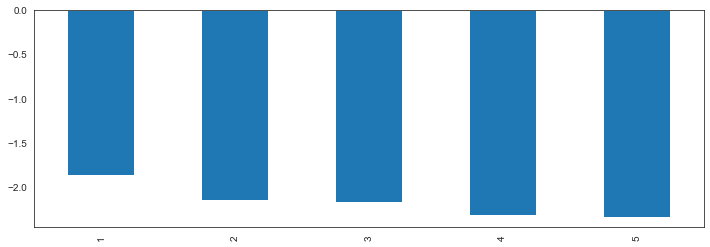

In [521]:
topic_coherence = []
topic_words = pd.DataFrame()
for t in range(len(coherence)):
    label = stars[t]
    topic_coherence.append(coherence[t][1])
    df = pd.DataFrame(coherence[t][0], columns=[(label, 'prob'), (label, 'term')])
    df[(label, 'prob')] = df[(label, 'prob')].apply(lambda x: '{:.2%}'.format(x))
    topic_words = pd.concat([topic_words, df], axis=1)
                      
topic_words.columns = pd.MultiIndex.from_tuples(topic_words.columns)
pd.set_option('expand_frame_repr', False)
topic_words.head().to_csv('topic_words.csv', index=False)
print(topic_words.head())

pd.Series(topic_coherence, index=stars).plot.bar(figsize=(12,4));